# Objective

* Predict whether the Student  ( Bad ) or  ( Good )

* Yes = student is good , No =student is bad

In [105]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

################# visualization #################
import matplotlib.pyplot as plt 
from PIL import  Image
import seaborn as sns 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [106]:
import pandas as pd
data = pd.read_csv (r"C:\Users\suvar\Desktop\Longistic regrassion\xAPI-Edu-Data.csv")

#first few rows
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [108]:
data.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [109]:
data.Class.value_counts(dropna=False)

M    211
H    142
L    127
Name: Class, dtype: int64

In [110]:
data["Class"].mode()[0]

'M'

In [111]:
for column in ['Class','gender','ParentAnsweringSurvey']:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [112]:
data.Class.value_counts(dropna=False)

M    211
H    142
L    127
Name: Class, dtype: int64

In [113]:
print(data.isnull().sum())

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


In [114]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [115]:
#Discussion to categorical column
def Discussion_lab(data) :
    if data["Discussion"] <= 6 :
        return "Discussion_0_6"
    elif (data["Discussion"] > 6) & (data["Discussion"] <= 12 ):
        return "Discussion_7_12"
    elif (data["Discussion"] > 12) & (data["Discussion"] <= 24) :
        return "Discussion_13_24"
    elif (data["Discussion"] > 24) & (data["Discussion"] <= 36) :
        return "Discussion_25-36"
    elif data["Discussion"] > 36 :
        return "Discussion_gt_36"
# banK = x
data["Discussion_group"] = data.apply(lambda x :Discussion_lab(x),axis = 1)

In [116]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Discussion_group
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,Discussion_13_24
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,Discussion_25-36
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,Discussion_25-36
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,Discussion_25-36
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,Discussion_gt_36


<AxesSubplot:xlabel='raisedhands'>

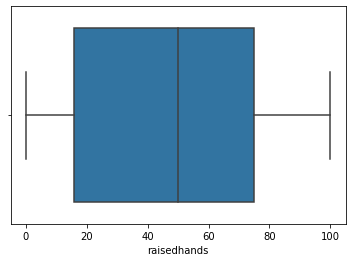

In [117]:
sns.boxplot(data.raisedhands)

In [118]:
data.Discussion_group.value_counts(dropna=False)

Discussion_gt_36    250
Discussion_13_24     88
Discussion_25-36     73
Discussion_7_12      46
Discussion_0_6       23
Name: Discussion_group, dtype: int64

In [119]:
((250+88+73)/480)*100

85.625

* 85% of customer required loan tenure for more than a Year

# Data Visualization
#### Bad Rate Analysis 

In [120]:
data.ParentAnsweringSurvey.value_counts()

Yes    270
No     210
Name: ParentAnsweringSurvey, dtype: int64

In [121]:
(210/480)*100

43.75

In [122]:
import plotly.express as px

fig = px.pie(data,names='ParentAnsweringSurvey',color='ParentAnsweringSurvey',
             color_discrete_map={'Yes':'red',
                                 'No':'green'})
fig.show()

In [123]:
data_Yes= data[data["ParentAnsweringSurvey"] == "Yes"]  # 269

data_Yes

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Discussion_group
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,Discussion_13_24
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,Discussion_25-36
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M,Discussion_gt_36
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M,Discussion_13_24
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M,Discussion_gt_36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Mum,87,93,63,60,Yes,Good,Under-7,H,Discussion_gt_36
470,M,Palestine,Jordan,MiddleSchool,G-08,A,History,F,Father,81,86,86,41,Yes,Good,Under-7,M,Discussion_gt_36
471,M,Palestine,Jordan,MiddleSchool,G-08,A,History,S,Father,78,82,78,53,Yes,Good,Under-7,M,Discussion_gt_36
472,M,Palestine,Palestine,MiddleSchool,G-08,A,Geology,F,Father,80,87,74,68,Yes,Good,Under-7,M,Discussion_gt_36


In [124]:
fig = px.sunburst(data_Yes, path=["gender",'PlaceofBirth','StageID',
                                    'GradeID','SectionID','Topic','Semester','Relation','Discussion','ParentAnsweringSurvey','ParentschoolSatisfaction','Class'])
fig.show()

In [125]:
data=data.drop('StageID',axis=1)
data.head()

,gender,NationalITy,PlaceofBirth,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Discussion_group
0,M,KW,KuwaIT,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,Discussion_13_24
1,M,KW,KuwaIT,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,Discussion_25-36
2,M,KW,KuwaIT,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,Discussion_25-36
3,M,KW,KuwaIT,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,Discussion_25-36
4,M,KW,KuwaIT,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,Discussion_gt_36


In [126]:
data.select_dtypes(include=[np.number]).columns.tolist()

['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

In [127]:
Quantitative_Variable = data[data.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30


In [128]:
Qualitative_Variable = data[data.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(3)

,gender,NationalITy,PlaceofBirth,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Discussion_group
0,M,KW,KuwaIT,G-04,A,IT,F,Father,Yes,Good,Under-7,M,Discussion_13_24
1,M,KW,KuwaIT,G-04,A,IT,F,Father,Yes,Good,Under-7,M,Discussion_25-36
2,M,KW,KuwaIT,G-04,A,IT,F,Father,No,Bad,Above-7,L,Discussion_25-36


In [129]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,gender,NationalITy,PlaceofBirth,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Discussion_group
0,1,4,4,1,0,7,0,0,1,1,1,2,1
1,1,4,4,1,0,7,0,0,1,1,1,2,2
2,1,4,4,1,0,7,0,0,0,0,0,1,2
3,1,4,4,1,0,7,0,0,0,0,0,1,2
4,1,4,4,1,0,7,0,0,0,0,0,2,4


In [130]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,gender,NationalITy,PlaceofBirth,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Discussion_group,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,1,4,4,1,0,7,0,0,1,1,1,2,1,15,16,2,20
1,1,4,4,1,0,7,0,0,1,1,1,2,2,20,20,3,25
2,1,4,4,1,0,7,0,0,0,0,0,1,2,10,7,0,30
3,1,4,4,1,0,7,0,0,0,0,0,1,2,30,25,5,35
4,1,4,4,1,0,7,0,0,0,0,0,2,4,40,50,12,50


In [131]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = Final_combined.drop('ParentAnsweringSurvey', axis = 1)
Y = Final_combined[['ParentAnsweringSurvey']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=56)

# Method 1 - Logistics Regression

#Needed to run the logistic regression
import statsmodels.formula.api as smf
result=smf.logit("ParentAnsweringSurvey~C(gender)+C(Class)+C(NationalITy)+C(PlaceofBirth)+C(GradeID)+C(Topic)+C(Topic)+C(Semester)+Relation+Discussion+AnnouncementsView+VisITedResources+raisedhands",data=train).fit()
print(result.summary2())

# Method 2 - Logistics Regression

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
output=logreg.fit(X_train, y_train) # model

In [133]:
output.intercept_

array([-1.17846407])

In [134]:
output.coef_ 

array([[-1.14817644e-02,  6.30617232e-03,  6.31219574e-03,
         3.25364069e-02,  2.00677541e-01, -2.09883326e-02,
        -4.93858482e-01, -5.33135445e-01,  2.16652218e+00,
         4.92519324e-02, -2.83351110e-01, -1.18179464e-01,
        -9.02623564e-03,  2.05307906e-03,  2.77618915e-02,
         1.14972889e-02]])

In [135]:
output.n_features_in_

16

In [136]:
output.feature_names_in_

array(['gender', 'NationalITy', 'PlaceofBirth', 'GradeID', 'SectionID',
       'Topic', 'Semester', 'Relation', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class', 'Discussion_group', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion'],
      dtype=object)

* We Reject Ho
* There is log linear relationship between ParentschoolSatisfaction and Class,Discussion_group,AnnouncementsView,Discussion

# Step 6 : Predictions on Train Dataset

In [137]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,gender,NationalITy,PlaceofBirth,GradeID,SectionID,Topic,Semester,Relation,ParentschoolSatisfaction,StudentAbsenceDays,Class,Discussion_group,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey
268,1,3,3,3,0,3,0,0,0,0,2,3,10,8,10,10,1
446,1,3,3,5,0,5,0,1,1,1,2,4,77,82,74,79,1
44,0,4,4,6,0,7,0,0,0,1,2,4,33,33,30,90,0
164,1,3,3,0,1,4,1,1,1,0,2,1,55,72,83,14,1
377,1,3,3,0,1,0,1,1,0,0,2,4,32,82,59,63,1


In [138]:
train['Predicted']=output.predict(X_train)
train.head()

,gender,NationalITy,PlaceofBirth,GradeID,SectionID,Topic,Semester,Relation,ParentschoolSatisfaction,StudentAbsenceDays,Class,Discussion_group,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,Predicted
268,1,3,3,3,0,3,0,0,0,0,2,3,10,8,10,10,1,0
446,1,3,3,5,0,5,0,1,1,1,2,4,77,82,74,79,1,1
44,0,4,4,6,0,7,0,0,0,1,2,4,33,33,30,90,0,0
164,1,3,3,0,1,4,1,1,1,0,2,1,55,72,83,14,1,1
377,1,3,3,0,1,0,1,1,0,0,2,4,32,82,59,63,1,0


train['Predicted']=np.where(train['Probability'] >= 0.7,1,0) 
train.head()

# Step 7 : Model Performance Metrics

In [139]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['ParentAnsweringSurvey'])
matrix

array([[119,  27],
       [ 49, 189]], dtype=int64)

In [140]:
Accuracy_Train=((119+189)/(384)*100)
print(Accuracy_Train)

80.20833333333334


* Accuracy of Model is 80% , So we say Model good fit data  

In [141]:
from sklearn.metrics import classification_report
print(classification_report(train['ParentAnsweringSurvey'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76       168
           1       0.79      0.88      0.83       216

    accuracy                           0.80       384
   macro avg       0.80      0.79      0.80       384
weighted avg       0.80      0.80      0.80       384



* Accuracy of  Model is 80%,Hence Model is good Fit 
* Accuracy of Bad Student Capture by Model is 88% ( Sensitivity )
* Accuracy of Good Student Capture by Model is 71% (Specificity)

# Step 8 : Predictions on Test Dataset


In [142]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,gender,NationalITy,PlaceofBirth,GradeID,SectionID,Topic,Semester,Relation,ParentschoolSatisfaction,StudentAbsenceDays,Class,Discussion_group,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey
103,1,4,4,0,1,7,0,0,0,0,1,3,1,7,6,10,0
134,1,4,4,4,0,9,1,0,1,1,0,4,80,80,15,70,1
435,1,3,3,5,0,2,1,1,1,0,2,1,79,88,79,20,1
91,1,4,4,0,1,7,0,0,1,1,0,1,80,90,55,19,1
246,0,4,4,3,0,10,1,0,1,1,0,4,80,94,62,77,1


In [143]:
test['Predicted']=output.predict(X_test)
test.head()

,gender,NationalITy,PlaceofBirth,GradeID,SectionID,Topic,Semester,Relation,ParentschoolSatisfaction,StudentAbsenceDays,Class,Discussion_group,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,Predicted
103,1,4,4,0,1,7,0,0,0,0,1,3,1,7,6,10,0,0
134,1,4,4,4,0,9,1,0,1,1,0,4,80,80,15,70,1,1
435,1,3,3,5,0,2,1,1,1,0,2,1,79,88,79,20,1,1
91,1,4,4,0,1,7,0,0,1,1,0,1,80,90,55,19,1,1
246,0,4,4,3,0,10,1,0,1,1,0,4,80,94,62,77,1,1


test['']=np.where(test['Probability'] >= 0.7,1,0) 
test.head()

# Step 9 : Model Performance Metrics on Test data 

In [144]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['ParentAnsweringSurvey'])
print(matrix)

[[31 11]
 [11 43]]


In [145]:
Accuracy_test=((31+43)/(96)*100)
Accuracy_test

77.08333333333334

In [146]:
from sklearn.metrics import classification_report
print(classification_report(test['ParentAnsweringSurvey'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        42
           1       0.80      0.80      0.80        54

    accuracy                           0.77        96
   macro avg       0.77      0.77      0.77        96
weighted avg       0.77      0.77      0.77        96



* Accuracy of  Model is 77%,Hence Model is good Fit 
* Accuracy of Bad Student Capture by Model is 80% ( Sensitivity )
* Accuracy of Good Student Capture by Model is 74% 

# Coefficient 

* For future Prediction below 4 variable data is mandatory 

* Note :- If anyone is not present output will not be reliable 

In [147]:
Model_Values=pd.DataFrame(output.intercept_,index=['Intercept'],columns=['Coefficient'])
Model_Values

,Coefficient
Intercept,-1.178464


In [148]:
rows=['gender', 'NationalITy', 'PlaceofBirth', 'GradeID', 'SectionID',
       'Topic', 'Semester', 'Relation', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class', 'Discussion_group', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion']

abc=pd.DataFrame(output.coef_.T,index=rows,columns=['Coefficient'])
abc

,Coefficient
gender,-0.011482
NationalITy,0.006306
PlaceofBirth,0.006312
GradeID,0.032536
SectionID,0.200678
Topic,-0.020988
Semester,-0.493858
Relation,-0.533135
ParentschoolSatisfaction,2.166522
StudentAbsenceDays,0.049252


In [149]:
Model_Values.append(abc)

,Coefficient
Intercept,-1.178464
gender,-0.011482
NationalITy,0.006306
PlaceofBirth,0.006312
GradeID,0.032536
SectionID,0.200678
Topic,-0.020988
Semester,-0.493858
Relation,-0.533135
ParentschoolSatisfaction,2.166522


# Finish
